In [3506]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')


# Data Overview

In [3507]:
df = pd.read_csv('marketing_campaign_data.csv', index_col=0)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3508]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5.592160e+03,3.246662e+03,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1.968806e+03,1.198407e+01,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.00,51381500.0,68522000.00,666666000.0
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,24.00,49.0,74.00,99.0
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,23750.00,173500.0,504250.00,1493000.0
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1000.00,8000.0,33000.00,199000.0
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,16000.00,67000.0,232000.00,1725000.0
MntFishProducts,2240.0,3.752545e+04,5.462898e+04,0.0,3000.00,12000.0,50000.00,259000.0


In [3509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   int64 

# Conversion rate analysis based on income, spending and age

In [3510]:
df = df[df['NumWebVisitsMonth'] > 0]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3511]:
df['Dt_Customer'] = df['Dt_Customer'].apply(lambda x : x.split('-')[-1])

df['Age'] = np.int64(df['Dt_Customer']) - df['Year_Birth']
df['Age Category'] = df['Age'].apply(lambda x : 'Dewasa' if x < 40 else ('Paruh Baya' if x < 60 else ('Manula')))

In [3512]:
dfg = df[df['Response'] == 0].groupby(['Age Category']).aggregate({'ID':'count'}).reset_index()
dfg2 = df[df['Response'] == 1].groupby(['Age Category']).aggregate({'ID':'count'}).reset_index()
dfg2['Conversion Rate'] = dfg2['ID'] / (dfg2['ID'] + dfg['ID']) * 100

dfg2['Age Category'] = pd.Categorical(dfg2['Age Category'], categories=['Dewasa', 'Paruh Baya', 'Manula'])
dfg2 = dfg2.sort_values('Age Category')
dfg2

,Age Category,ID,Conversion Rate
0,Dewasa,134,16.028708
2,Paruh Baya,157,14.030384
1,Manula,43,15.693431


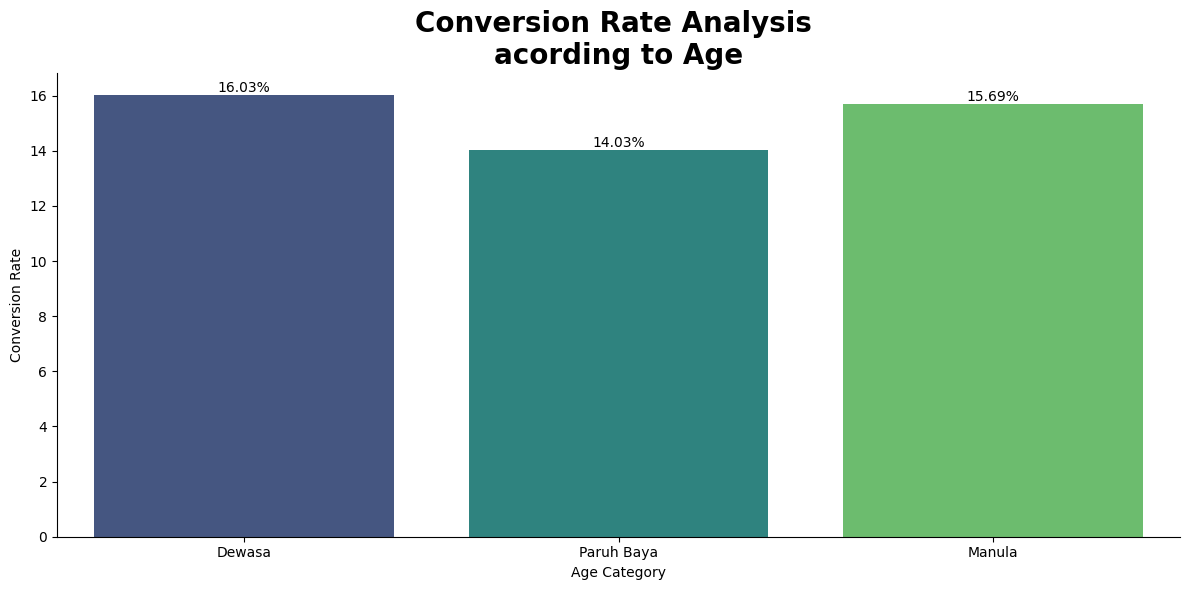

In [3513]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = dfg2['Age Category'], y = 'Conversion Rate', data = dfg2, palette='viridis')

plt.title('Conversion Rate Analysis \nacording to Age', weight='bold', fontsize = 20)
sns.despine()
plt.tight_layout()

plt.bar_label(ax.containers[0], fmt='%.2f%%')
plt.show()

# Data Cleaning & Preprocessing

In [3514]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 23
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Age Category            0
dtype: int64

In [3515]:
df = df.dropna()

In [3516]:
df = df.drop(columns='ID')
df.duplicated().sum()

183

In [3517]:
df = df.drop_duplicates()

In [3518]:
from sklearn.preprocessing import LabelEncoder
labelencod = LabelEncoder()

df['Marital_Status'] = labelencod.fit_transform(df['Marital_Status'])
df['Age Category'] = labelencod.fit_transform(df['Age Category'])
df['Education'] = labelencod.fit_transform(df['Education'])

In [3519]:
from sklearn.preprocessing import StandardScaler
standscale = StandardScaler()

df['Income'] = standscale.fit_transform(df[['Income']])
df['MntCoke'] = standscale.fit_transform(df[['MntCoke']])
df['MntFruits'] = standscale.fit_transform(df[['MntFruits']])
df['MntMeatProducts'] = standscale.fit_transform(df[['MntMeatProducts']])
df['MntFishProducts'] = standscale.fit_transform(df[['MntFishProducts']])
df['MntSweetProducts'] = standscale.fit_transform(df[['MntSweetProducts']])
df['MntGoldProds'] = standscale.fit_transform(df[['MntGoldProds']])

<Axes: >

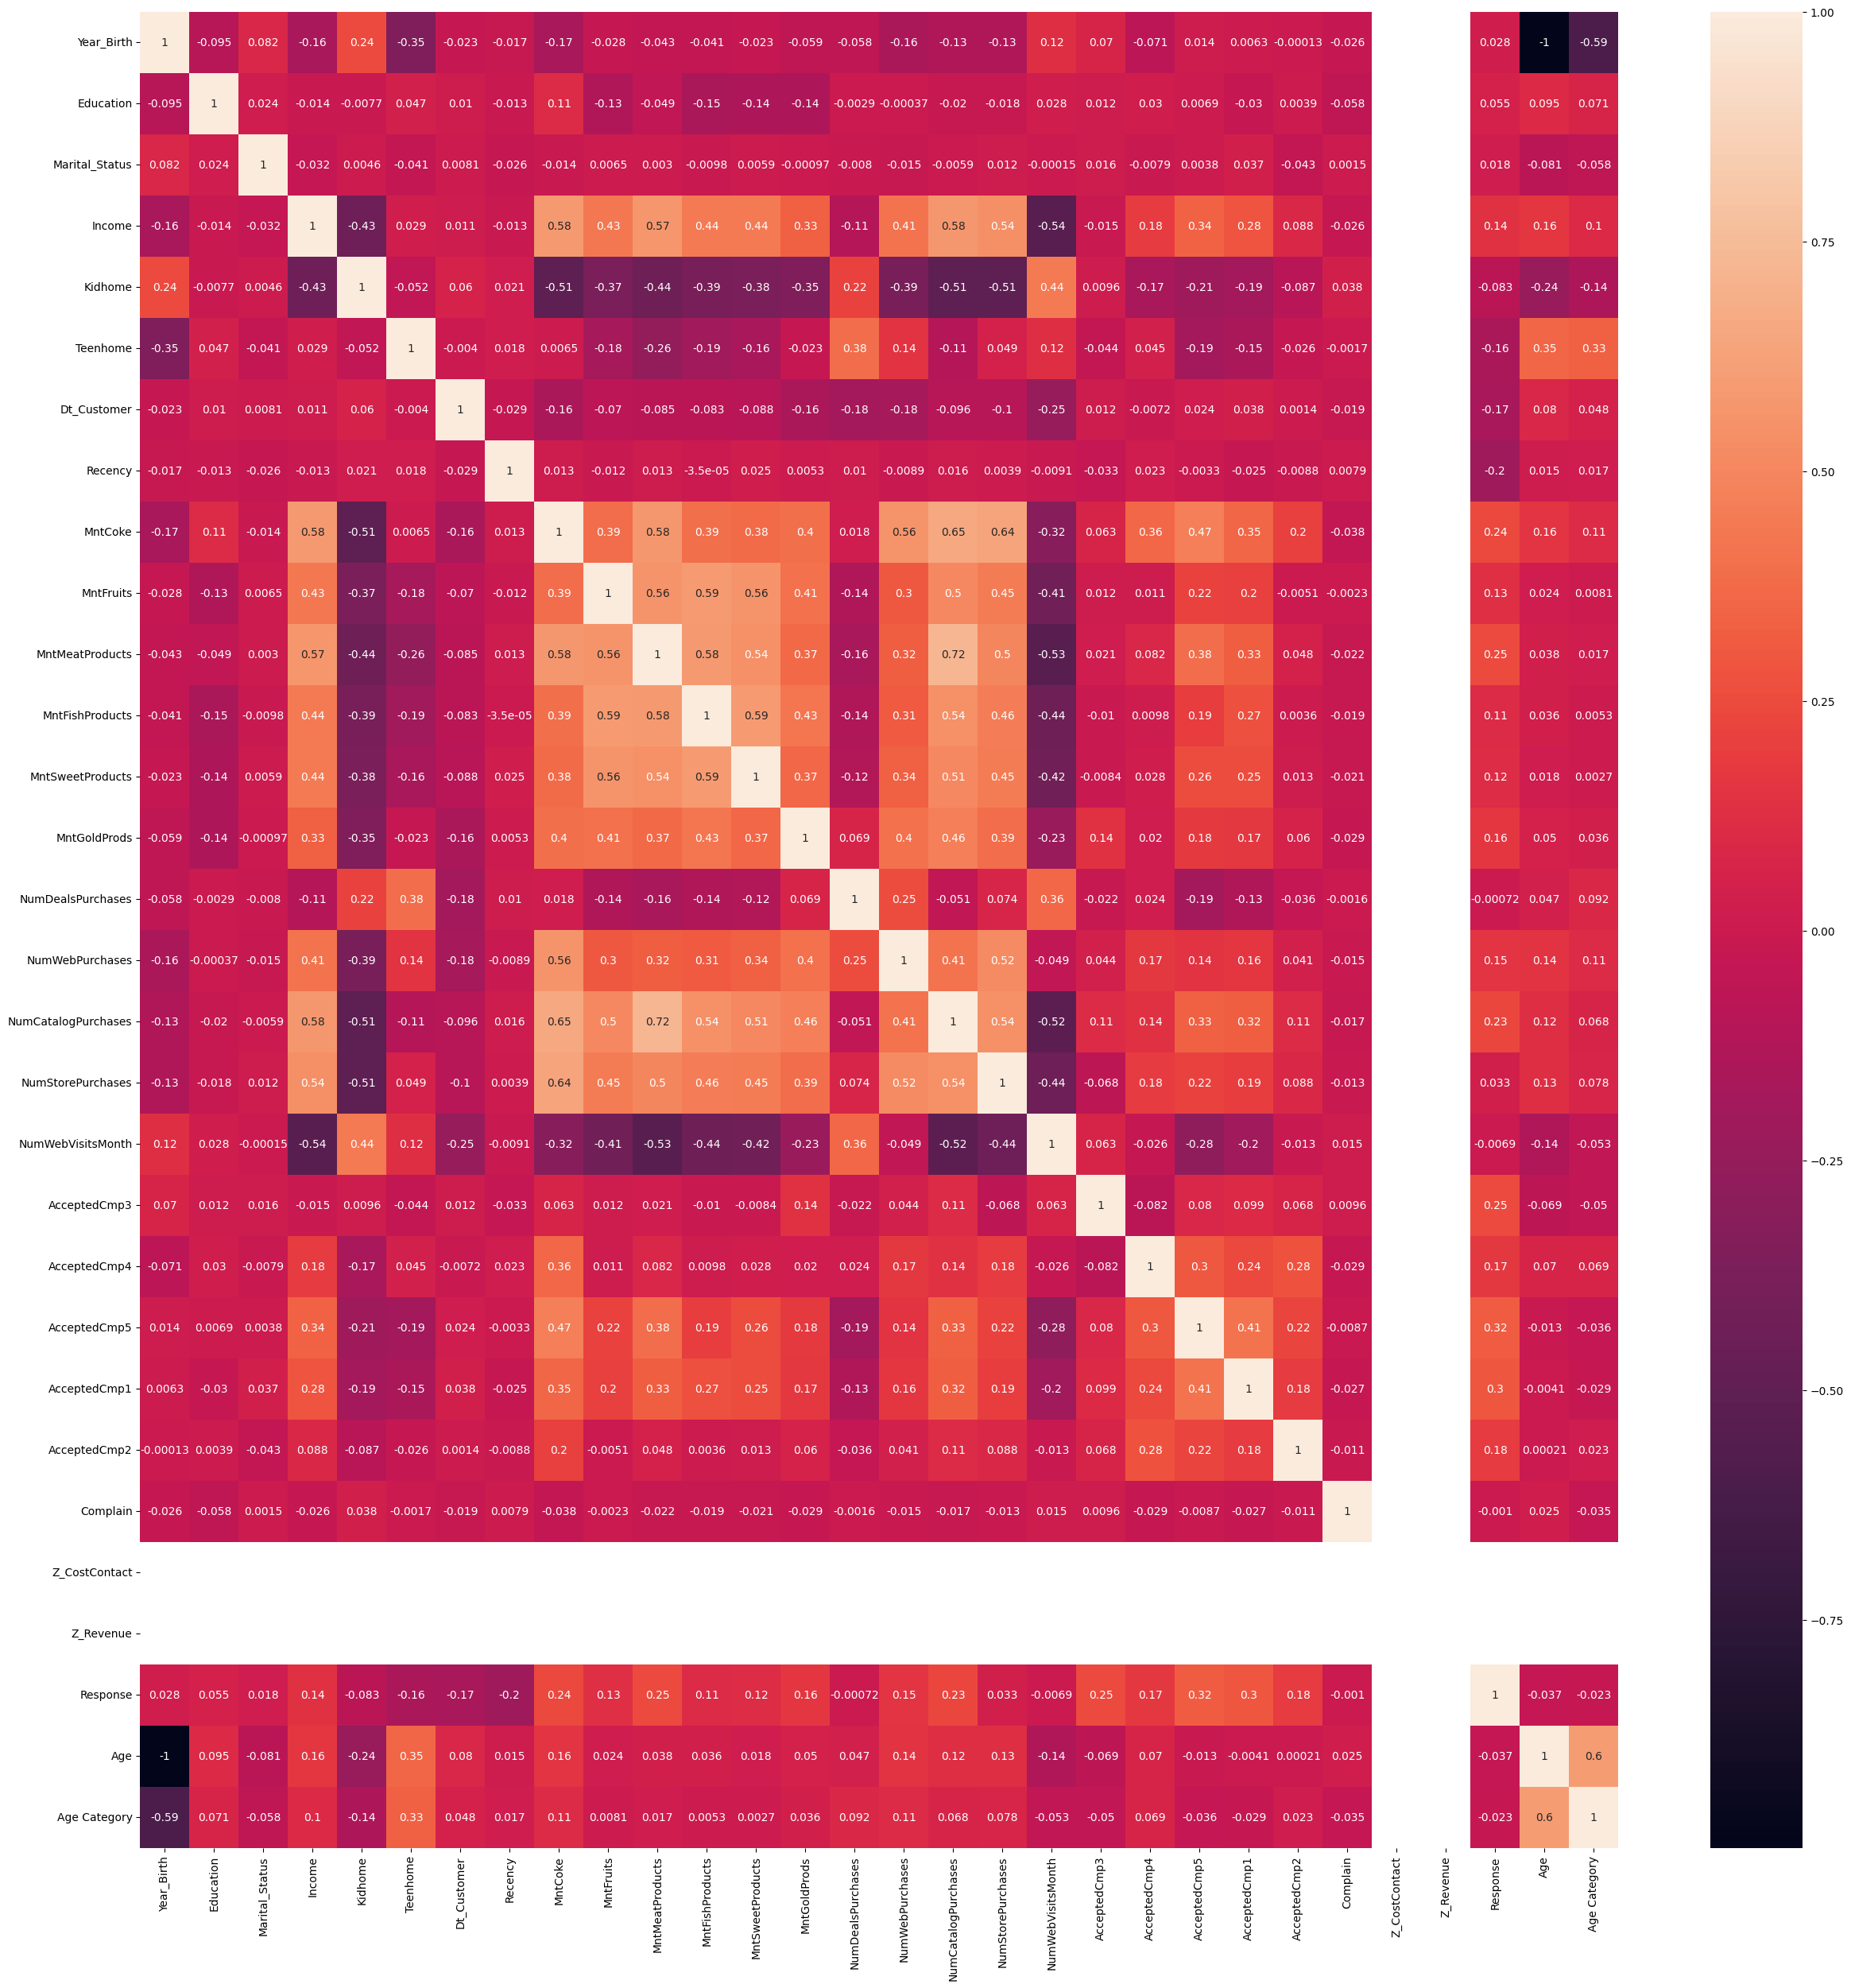

In [3520]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot= True)

In [3521]:
df['Child'] = df['Kidhome'] + df['Teenhome']
df['Total'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Total_Purchase'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']


In [3522]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age Category
0,1957,1,4,0.240893,0,0,2012,58,0.975634,1.556772,1.707946,2.470352,1.462907,0.862716,3,8,10,4,7,0,0,0,0,0,0,3,11,1,55,2
1,1954,1,4,-0.229233,1,1,2014,38,-0.871847,-0.636614,-0.719659,-0.646304,-0.630251,-0.734218,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,1
2,1965,1,0,0.778026,0,0,2013,26,0.356846,0.573530,-0.175696,1.352022,-0.149065,-0.033125,1,8,2,10,4,0,0,0,0,0,0,3,11,0,48,2
3,1984,1,0,-1.014423,1,0,2014,26,-0.871847,-0.560980,-0.656721,-0.499638,-0.582133,-0.753693,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,0
4,1981,3,5,0.247071,1,0,2014,94,-0.392212,0.422262,-0.216156,0.160359,-0.004710,-0.558945,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,0


# Modeling

In [3523]:
from sklearn.cluster import KMeans

inertia = []

for i in range(1,11) :
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

<Axes: >

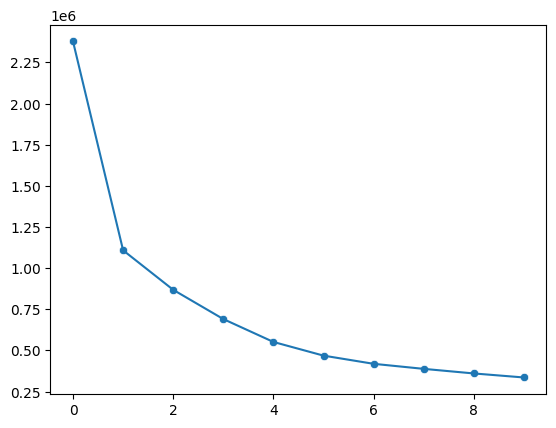

In [3524]:
sns.lineplot(inertia)
sns.scatterplot(inertia)

In [3525]:
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    53.386514
1    21.647590
2    20.466215
3    20.141808
4    15.070274
5    10.623395
6     7.322904
7     7.186853
8     6.794655
9          NaN
dtype: float64

In [3526]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=42).fit(df)
    preds = kmeans.predict(df)
     
    score_euclidean = silhouette_score(df, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

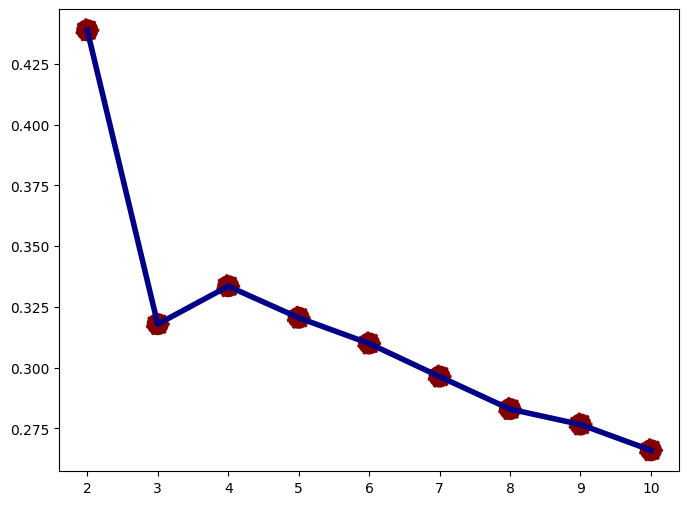

In [3527]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.show()

In [3528]:
clast =arr_silhouette_score_euclidean.index(max(arr_silhouette_score_euclidean)) + 2

In [3529]:
kmeans = KMeans(n_clusters=clast, random_state=42).fit(df)
clusters = kmeans.labels_
df['clusters'] = clusters

In [3530]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=3)
pca.fit(df)
pcs = pca.transform(df)
final_pca = pd.DataFrame(data = pcs, columns = ['PC1', 'PC2','PC3'])
final_pca['clusters'] = clusters
final_pca.head()

,PC1,PC2,PC3,clusters
0,9.430264,16.056998,-4.176887,1
1,-10.510710,21.513614,5.880942,0
2,-22.733294,5.989436,-4.241890,0
3,-23.119128,-20.623404,3.149458,0
4,44.938389,-17.161813,-1.394303,1


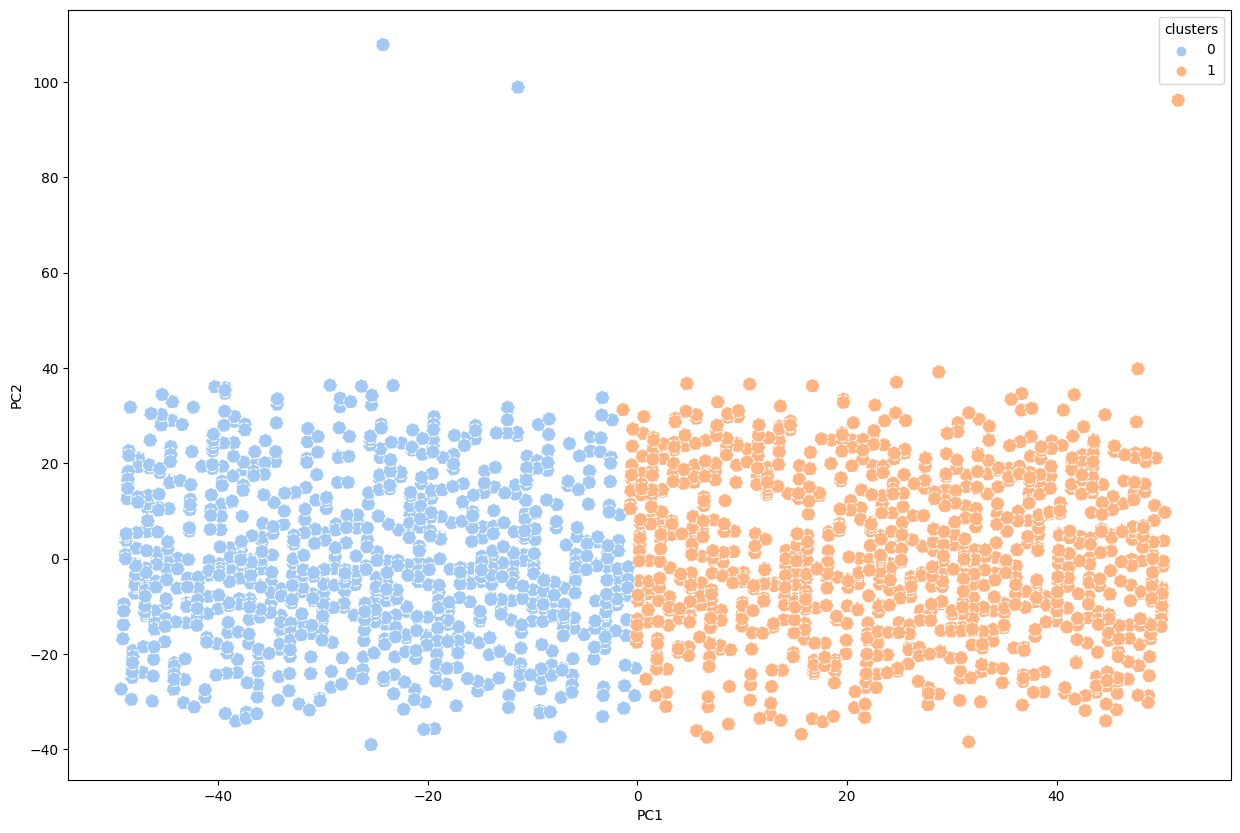

In [3531]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='PC1', y='PC2',hue='clusters',palette = 'pastel', linestyle= '--', s=100,data=final_pca,ax=ax)
plt.show()

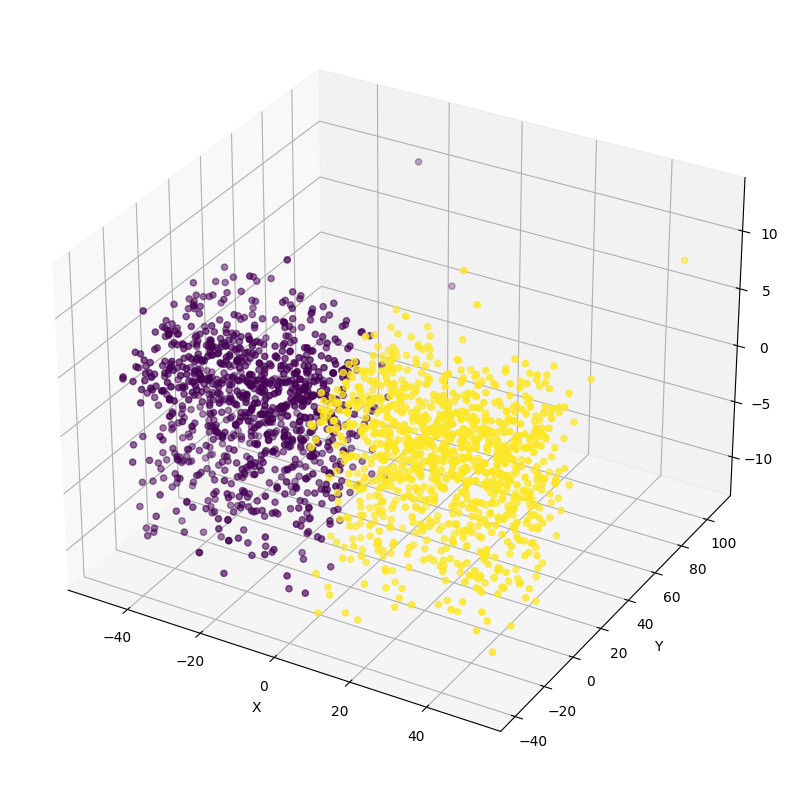

In [3532]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(x, y, z, hue):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c=hue)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.show()

plot_3d(final_pca['PC1'], final_pca['PC2'], final_pca['PC3'], hue = final_pca['clusters'])